# 폐암환자 생존율 예측

In [3]:
import numpy as np 
import pandas as pd 
from google.colab import files

uploaded = files.upload()

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


In [4]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1


# 데이터셋 만들기

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.iloc[:,:-1].values)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df[17].values, stratify=df[17].values, random_state=2021
)
X_train.shape, X_test.shape

((352, 17), (118, 17))

## 모델정의/설정/학습/평가

In [9]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) Hidden Layer : 1개, 노드의 갯수 : 30

In [12]:
model1 = Sequential()
model1.add(Dense(30, input_shape=(17,), activation='relu'))   # 첫번째 은닉층
model1.add(Dense(1, activation='sigmoid'))    #출력층
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)

Epoch 1/30
29/29 [==============================] - 1s 8ms/step - loss: 0.7646 - accuracy: 0.4195 - val_loss: 0.6231 - val_accuracy: 0.6901
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6750 - val_loss: 0.5465 - val_accuracy: 0.8028
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7695 - val_loss: 0.5049 - val_accuracy: 0.8028
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8155 - val_loss: 0.4827 - val_accuracy: 0.8310
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8373 - val_loss: 0.4707 - val_accuracy: 0.8028
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8921 - val_loss: 0.4659 - val_accuracy: 0.8028
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8706 - val_loss: 0.4621 - val_accuracy: 0.8028
Epoch 8/30
29/29 [==

In [18]:
acc = model1.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.8390
정확도: 0.8390


- Case 2) Hidden Layer의 갯수:2, 노드의 갯수 : 24, 10

In [19]:
model2 = Sequential([
    Dense(24, input_dim=17, activation='relu'),   #첫번째 은닉층
    Dense(10, activation='relu'),                 #두번째 은닉층
    Dense(1, activation='sigmoid')                #출력층
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)

Epoch 1/30
29/29 [==============================] - 1s 8ms/step - loss: 0.8529 - accuracy: 0.3818 - val_loss: 0.6341 - val_accuracy: 0.6620
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6868 - val_loss: 0.5552 - val_accuracy: 0.7887
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8319 - val_loss: 0.5237 - val_accuracy: 0.8169
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8277 - val_loss: 0.5039 - val_accuracy: 0.8028
Epoch 5/30
29/29 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8416 - val_loss: 0.4969 - val_accuracy: 0.8028
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8873 - val_loss: 0.4954 - val_accuracy: 0.8028
Epoch 7/30
29/29 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8590 - val_loss: 0.4933 - val_accuracy: 0.8028
Epoch 8/30
29/29 [==

In [22]:
acc = model2.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8305
정확도: 0.8305


- Case 3)  Hidden Layer의 갯수:3, 노드의 갯수 : 30, 16, 4

In [23]:
model3 = Sequential([
    Dense(30, input_dim=17, activation='relu'),   #첫번째 은닉층
    Dense(16, activation='relu'),                 #두번째 은닉층
    Dense(4, activation='relu'),                 #세번째 은닉층
    Dense(1, activation='sigmoid')                #출력층
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                540       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 1,109
Trainable params: 1,109
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)

Epoch 1/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1553 - accuracy: 0.9395 - val_loss: 0.7712 - val_accuracy: 0.8028
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9359 - val_loss: 0.7667 - val_accuracy: 0.7887
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9395 - val_loss: 0.7778 - val_accuracy: 0.8028
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9395 - val_loss: 0.7955 - val_accuracy: 0.7887
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9395 - val_loss: 0.7874 - val_accuracy: 0.7887
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.9431 - val_loss: 0.8004 - val_accuracy: 0.7887
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9431 - val_loss: 0.8031 - val_accuracy: 0.7887
Epoch 8/30
29/29 [==

In [31]:
acc = model3.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.7966
정확도: 0.7966


### 학습과정 시각화

In [29]:
type(history1.history)

dict

In [32]:
history1.history['accuracy'][:3]

[0.4839857518672943, 0.7224199175834656, 0.7971529960632324]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# 검증셋의 오차
y_vloss = history1.history['val_loss']

In [37]:
# 학습셋의 정확도
y_acc = history1.history['accuracy']

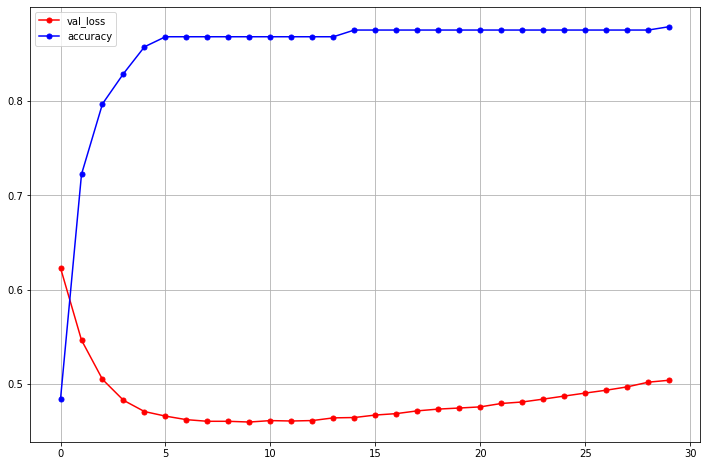

In [41]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, 'or-', markersize=5, label='val_loss')
plt.plot(x_len, y_acc, 'bo-', markersize=5, label='accuracy')
plt.legend()
plt.grid()
plt.show()